## Evaluating Random NumberGenerators through Monte Carlo Methods

###  importing libraries

In [23]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
import random
import time

### Function to estimate π using Monte Carlo simulation

In [2]:
def estimate_pi_and_plot(num_points):
    inside_circle = 0
    approximation = np.empty(num_points)
    
    for i in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if x**2 + y**2 <= 1:
            inside_circle += 1

        approximation[i] = 4 * inside_circle / (i + 1)
    

    # Plotting the approximation over iterations
    plt.semilogx(approximation)
    plt.xlabel("Number of iterations")
    plt.ylabel("Current approximation")
    plt.axhline(np.pi, color="r", alpha=0.5, label="Exact Pi")
    plt.legend()
    plt.show()
    
    return approximation[-1]



###  estimating pie on different sizes of input

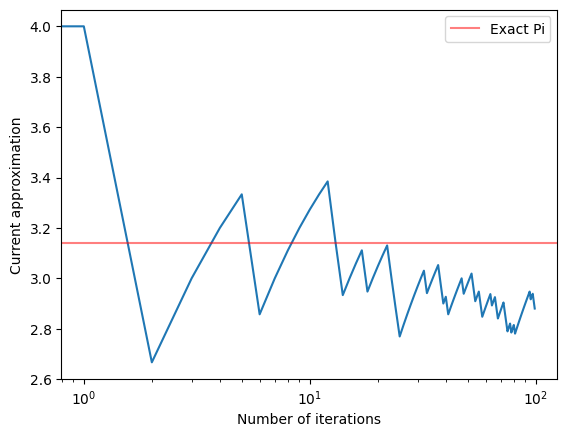

running on input size 100 completed Execution in 0.1942613124847412 seconds


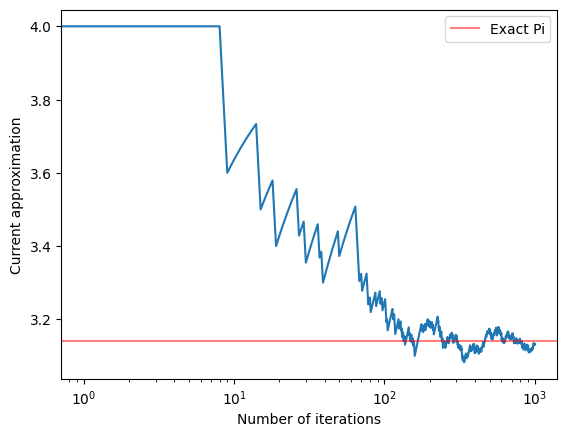

running on input size 1000 completed Execution in 0.14794445037841797 seconds


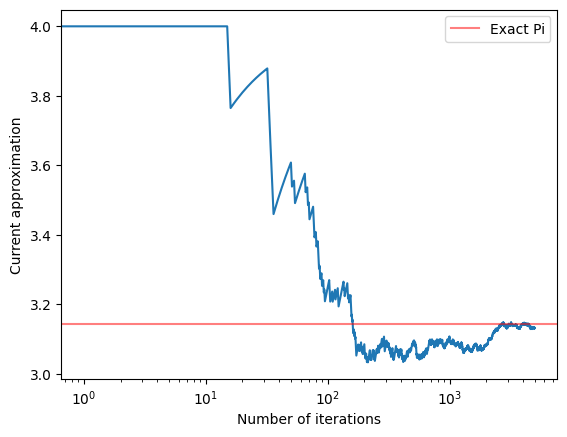

running on input size 5000 completed Execution in 0.15026235580444336 seconds


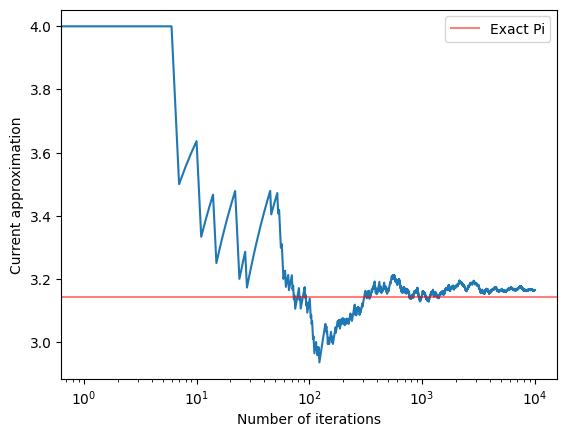

running on input size 10000 completed Execution in 0.20625686645507812 seconds


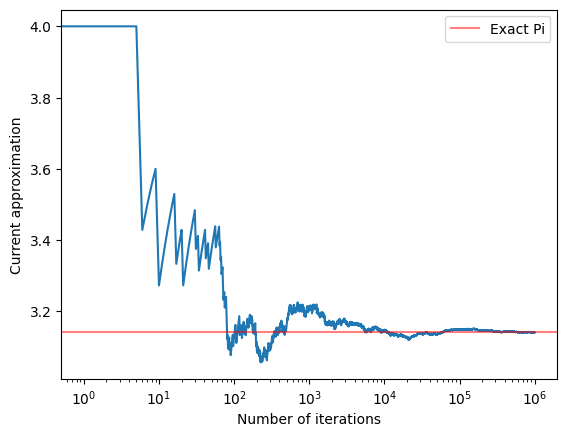

running on input size 1000000 completed Execution in 1.0879175662994385 seconds


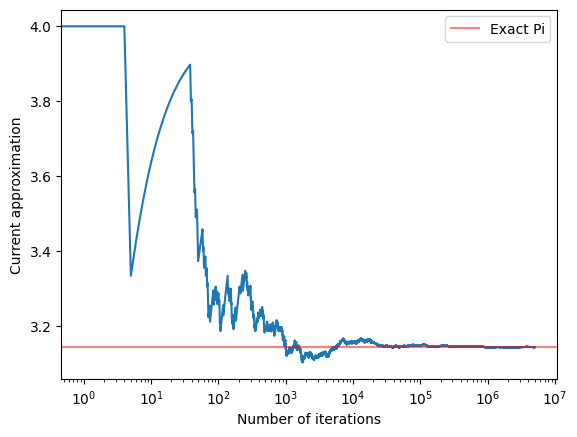

running on input size 5000000 completed Execution in 4.588370084762573 seconds


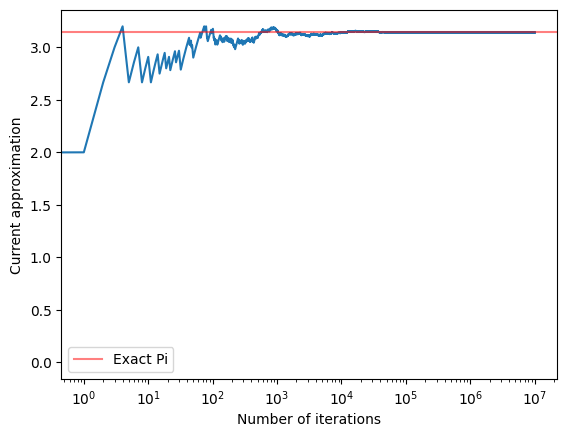

running on input size 10000000 completed Execution in 10.90052604675293 seconds


In [3]:
num_points_array = [100, 1_000, 5_000, 10_000,1_000_000, 5_000_000, 10_000_000]

estimation=[]
for input in num_points_array:
    
    start_time = time.time()
    e=estimate_pi_and_plot(input)
    end_time = time.time()

    
    execution_time = end_time - start_time
    print(f"running on input size {input} completed Execution in {execution_time} seconds")
    estimation.append(e)
    
    


### Visualizing Convergence as Input Size Increases

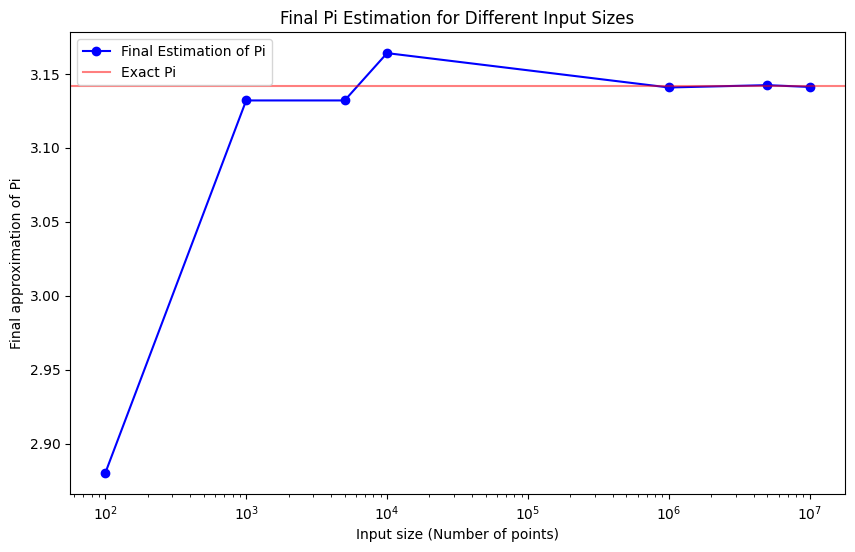

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(num_points_array, estimation, marker='o', color='b', label="Final Estimation of Pi")
plt.axhline(np.pi, color="r", alpha=0.5, label="Exact Pi")
plt.xlabel("Input size (Number of points)")
plt.ylabel("Final approximation of Pi")
plt.legend()
plt.title("Final Pi Estimation for Different Input Sizes")
plt.xscale('log')  # Log scale for input sizes for better visualization
plt.show()

In [5]:
print(num_points_array, estimation)


[100, 1000, 5000, 10000, 1000000, 5000000, 10000000] [np.float64(2.88), np.float64(3.132), np.float64(3.132), np.float64(3.164), np.float64(3.140764), np.float64(3.1423472), np.float64(3.1411184)]


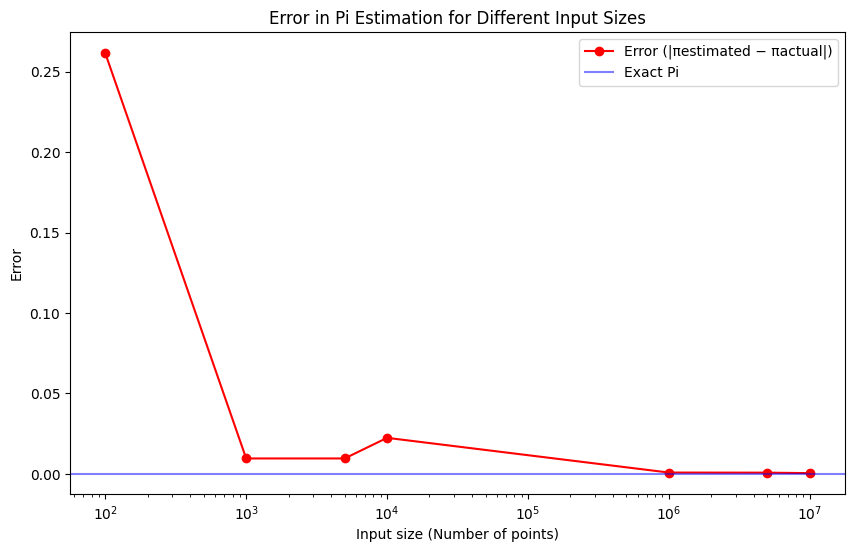

In [9]:
def calculate_and_plot_error(num_points_array, estimation):
    # Ensure that the length of num_points_array matches the length of estimation
    if len(num_points_array) != len(estimation):
        raise ValueError("The length of num_points_array and estimation must be the same.")
    
    error = [abs(e - np.pi) for e in estimation]

    # Visualizing the error for different input sizes
    plt.figure(figsize=(10, 6))
    plt.plot(num_points_array, error, marker='o', color='r', label="Error (|πestimated − πactual|)")
    plt.axhline(0, color="b", alpha=0.5, label="Exact Pi")
    plt.xlabel("Input size (Number of points)")
    plt.ylabel("Error")
    plt.title("Error in Pi Estimation for Different Input Sizes")
    plt.xscale('log')  # Log scale for input sizes for better visualization
    plt.legend()
    plt.show()

calculate_and_plot_error(num_points_array, estimation)


## Numerical Integration Using Monte Carlo Methods

### Function to integrate

In [69]:
def f(x):
    return np.exp(-x**2)
true_integral = np.sqrt(np.pi)

### Monte Carlo Integration Function

In [106]:
def monte_carlo_integration(func, a, b, num_samples):
    samples = np.random.uniform(a, b, num_samples)
    function_values = func(samples)
    integral_estimate = (b - a) * np.mean(function_values)
    
    return integral_estimate

### Function to calculate and plot error

In [100]:
def calculate_and_plot_error_1d(a, b, N_values, true_integral):
    estimated_values = []
    error_values = []

    for N in N_values:
        estimated_integral = monte_carlo_integral_1d(f, a, b, N)
        estimated_values.append(estimated_integral)
        error_values.append(abs(estimated_integral - true_integral))
    print(estimated_values)
    # Plotting the error
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, error_values, marker='o', color='r', label="Error (|Estimated - True Integral|)")
    plt.axhline(0, color="b", alpha=0.5, label="True Integral")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Error")
    plt.xscale('log')  # Use log scale for N for better visualization
    plt.title("Error in 1D Monte Carlo Integration for Different Sample Sizes")
    plt.legend()
    plt.show()

### Plot Convergence

In [101]:
def plot_monte_carlo_convergence(a, b, N_values, true_integral):
    mc_results = []
    
    # Loop over sample sizes to calculate estimates
    for N in N_values:
        estimated_integral = monte_carlo_integral_1d(f, a, b, N)
        mc_results.append(estimated_integral)
    
    
    # Plotting the convergence of the Monte Carlo estimate
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, mc_results, label="Monte Carlo Estimate", marker='o', linestyle='--')
    plt.axhline(true_integral, color='r', label=f"True Value: {true_integral:.6f}")
    plt.xscale('log')
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Integral Estimate")
    plt.title("Monte Carlo Integration Convergence")
    plt.legend()
    plt.grid()
    plt.show()

In [115]:
N_values = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]

[np.float64(0.7399469503286791), np.float64(0.753259224020371), np.float64(0.7497338612856211), np.float64(0.7460797725076238), np.float64(0.745950137706758), np.float64(0.7467014897548092)]


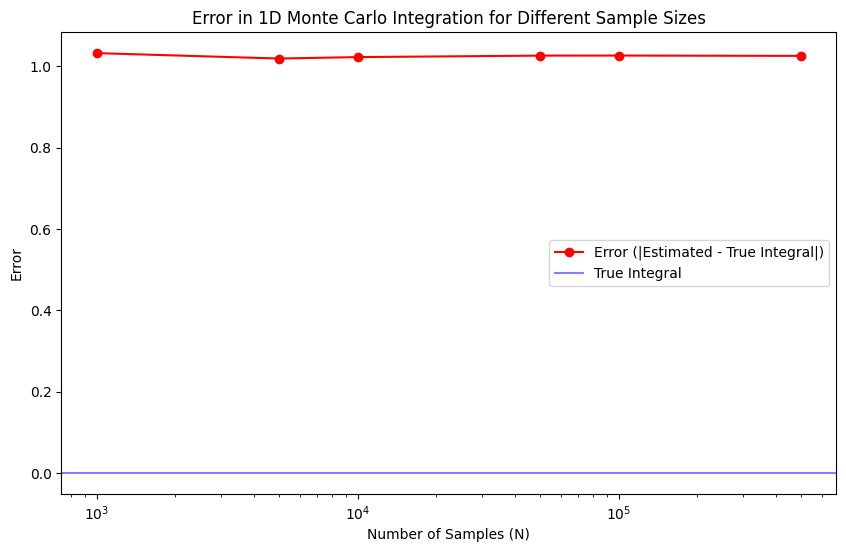

In [ ]:
calculate_and_plot_error_1d(0, 1, N_values, true_integral)

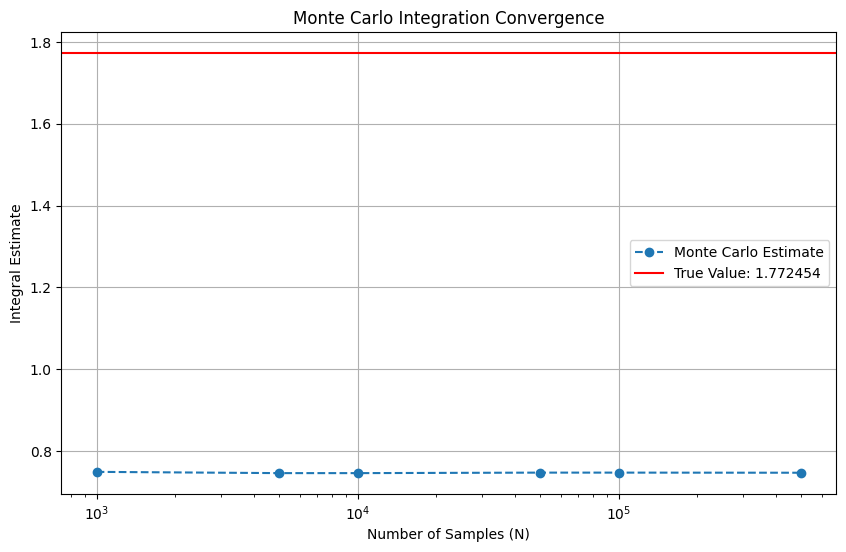

In [105]:
plot_monte_carlo_convergence(0, 1, N_values, true_integral)

### 2D Integration

In [116]:
def f_2d(x, y):
    return np.exp(-(x**2 + y**2))

### Monte Carlo Integration Function for 2D

In [117]:
def monte_carlo_integral_2d(func, a, b, N):
    x_samples = np.random.uniform(a, b, N)
    y_samples = np.random.uniform(a, b, N)
    integral = (b - a)**2 * np.mean(func(x_samples, y_samples))
    return integral

### Monte Carlo Results for 2D

In [118]:
mc_results_2d = [monte_carlo_integral_2d(f_2d, a, b, N) for N in N_values]

### Plot Convergence for 2D

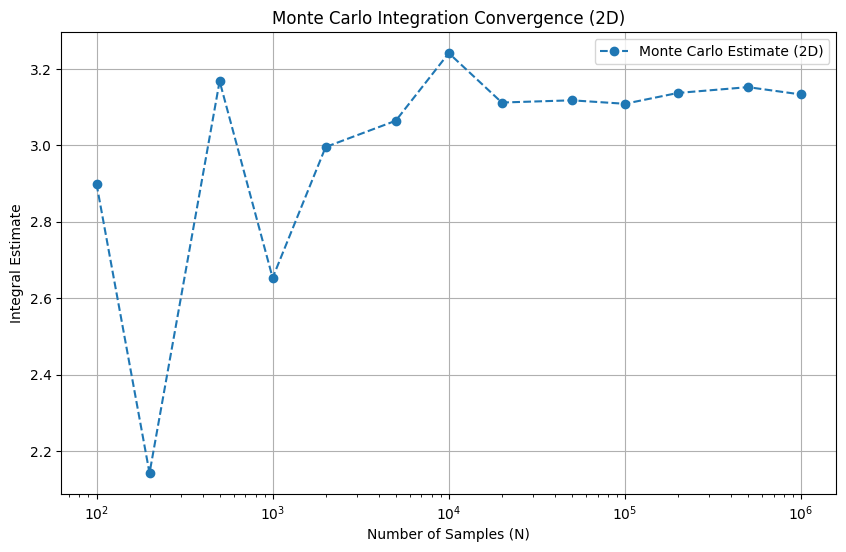

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, mc_results_2d, label="Monte Carlo Estimate (2D)", marker='o', linestyle='--')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Integral Estimate")
plt.title("Monte Carlo Integration Convergence (2D)")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

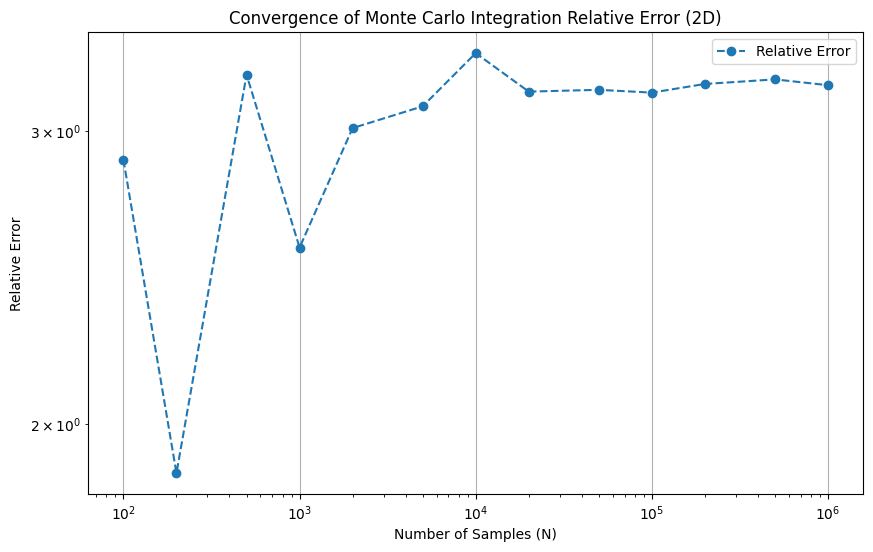

In [126]:
relative_errors = [abs(result - true_value) / abs(true_value) for result in mc_results_2d]

# Plotting the relative error vs number of samples (log-log scale)
plt.figure(figsize=(10, 6))
plt.plot(N_values, relative_errors, label="Relative Error", marker='o', linestyle='--')
plt.yscale('log')  # Log scale for error
plt.xscale('log')  # Log scale for number of samples
plt.xlabel("Number of Samples (N)")
plt.ylabel("Relative Error")
plt.title("Convergence of Monte Carlo Integration Relative Error (2D)")
plt.legend()
plt.grid(True)
plt.show()